# Physics 381 - Midterm

Submitted by Craig Michie, 30001523

## Introduction

The purpose of this midterm is to use python and related packages to evaluate the Chebyshev polynomials by writing a function, using this function to generate a plot of the chebyshev polynomials, use numerical integration to calculate the weighted integral inner product then compare the results to the kroneker delta function, then plot the lissajous figures, then determine the maximum speed of an object under the motion of the lissajous curve and then test the comparison between the Chebyshev polynomials and the Lissajous figures.

### Task 1a: A function to evaluate the ChebyShev polynomials

First we have to import the packages used throughout the assignment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate, math
import timeit

Now a function that evaluates the Chebyshev polynomial 

In [3]:
#This function evaluates the chebyshev polynomail and includes the parameters given.
def Chebyshev1_recur(x,n):
    if n == 0: return 1-0*x
    elif n == 1: return x
    else: return 2*x*Chebyshev1_recur(x,n-1) - Chebyshev1_recur(x,n-2)

Now test if the function returns a correct result

In [4]:
#the result should be 2, since if n ==1 it should return x
print(Chebyshev1_recur(2,1))

2


Since the function returned a correct result, can now use this function throughout the rest of the midterm

### Task 1b: Using the Chebyshev function, plot the first 6 polynomials between x = -1 & 1

Using the chebyshev polynomial function and a while loop the following plot can be created

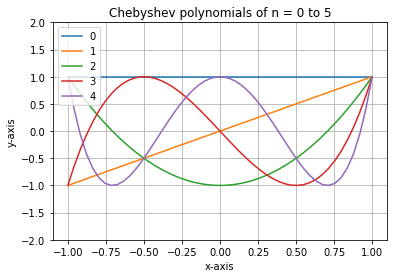

In [5]:
#bounds for the plot
x=np.linspace(-1,1)
plt.ylim(-2,2)
n=0
#while loop that evaluates the chebyshev polynomial for increasing n from 0 to 5
while n < 5:
    plt.plot(x,Chebyshev1_recur(x,n), label = n)
    n = n + 1
#Details for the graph    
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Chebyshev polynomials of n = 0 to 5' )
plt.grid(True)
plt.legend(loc=2)
plt.show()

### Task 2: Using numerical integration to calculate the integral inner product for increasing values of n and m. Tabulate the results for N = 5 and determine the highest values of n and m the code can handle in a reasonable amount of time.

First a function is created to calculate the integral of the function and evaluates the results when N = 5.

In [6]:
#A function that specifies the function to be integrated later
def function(x,n,m):
    return ((Chebyshev1_recur(x,n)*Chebyshev1_recur(x,m))/(np.sqrt(np.abs(1-x**2))))
#A function that integrates the chebyshev polynomial for x for the values of n and m 
#and appends them all to a list
a=[]
def IntegrateThatFunction(n):
    for l in range(1,n+1):
        for m in range(1,n+1):
            if m > l: #since m cannot be larger than n the loop is designed to break
                break
            else:
                result = np.abs(round(scipy.integrate.quad(function,-1,1,args = (l,m))[0],5))
            a.append(result)
    return a
    print(a)
print(IntegrateThatFunction(5))
#should produce a list that when n=m returns a value and when n != m returns 0

[1.5708, 0.0, 1.5708, 0.0, 0.0, 1.5708, 0.0, 0.0, 0.0, 1.5708, 0.0, 0.0, 0.0, 0.0, 1.5708]


Now to tabulate results. Firstly, organize results into rows and then create the table.

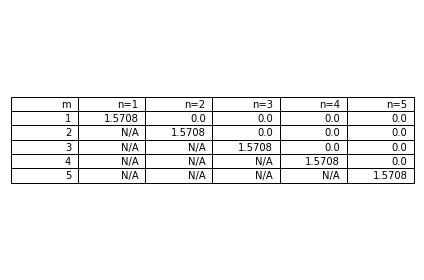

In [7]:
#organize the results into rows
Row1 = ['m','n=1','n=2','n=3','n=4','n=5']
Row2 = ['1',a[0],a[1],a[3],a[6],a[10]]
Row3 = ['2',"N/A",a[2],a[4],a[7],a[11]]
Row4 = ['3','N/A','N/A',a[5],a[8],a[12]]
Row5 = ['4','N/A','N/A','N/A',a[9],a[13]]
Row6 = ['5','N/A','N/A','N/A','N/A',a[14]]
#Create the Table now
fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')
ax.axis("tight")
datalist = [Row1,Row2,Row3,Row4,Row5,Row6]
ax.table(cellText= datalist, loc = 'center')
fig.tight_layout()
plt.show()

Now we record the times to evaluate what values of n and m the code can handle in a reasonable amount of time.

In [8]:
for N in range(1,13):
    %timeit (IntegrateThatFunction(N))

1.82 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.93 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.8 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.6 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.1 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
61.1 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
108 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
181 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
324 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
547 ms ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
940 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.63 s ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


By observing the times it took for increasing N between 1 and 11 we see that the time slows down with every passing and by N = 12 an observed average time of 1.65 seconds which is slow. I believe the maximum my code can handle is about 6 as I believe that anything over 100ms is not a reasonable amount of time.

### Task 3a: Plot of Lissajous curve

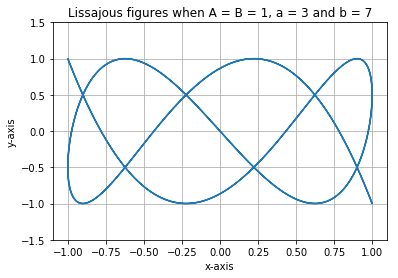

In [16]:
#details of the plot for the lissajous curve
x=np.linspace(-10,10)
plt.ylim(-1.5,1.5)
t=np.linspace(-np.pi,np.pi,400)
x = np.sin(3*t+(6/7)*np.pi/2)
y= np.sin(7*t)
plt.plot(x,y)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Lissajous figures when A = B = 1, a = 3 and b = 7' )
plt.grid(True)
plt.show()

### Task 3b: what is the maximum speed of the object and at what t does it occur and give its position

speed of the object comes from taking the derivative of the x and y functions with respect to time:
$$ x(t) = sin(3t+\pi/2)$$
$$ y(t) = sin(7t) $$
The derivative of these are: 
$$ dx/dt = 3cos(3t+\pi/2)$$
$$dy/dt = 7cos(7t) $$
Since cos(x) varies between 1 and -1 we know the maximum speed occurs when: $$cos(x) = cos(i\pi)$$ since speed is the magnitude of velocity so maximum speed occurs at both cos(x) = 1 and -1. Resulting in the maximum speed of the x(t) function to be 3 and the maximum speed of the y(t) function to be 7. These speeds occur at different times however so the maximum speed occurs at 8pi/7 +/- 2pi*I, where I = 1,2,3,4,... these values result in the maximum speed in the function dx/dt and dy/dt. 
Therefore the maximum speed is: $$\sqrt(7^2+2.92478^2)$$
This is the magnitude of the velocity of dx/dt and dy/dt at t = 8pi/2. Which is calculated to be: $$ |\vec v(t)| = 7.6 m/s$$
By subbing in the determined t into the position equations, the location of the object is determined to be:
$$ \vec r(t) = -0.22m  \vec i + 0m  \vec j$$



### Task 4: Create a table of x value, chebyshev, lissajous and the difference

Firstly, a function is needed to evaluate Xk and a list that appends these values to be used later on for the table.

In [10]:
#A function that describes the equation to be passed through the chebyshev & lissajous functions
#since n was given to be equal to 5, the variable n was replaced by 5 in the equation.
def Xk(k):
    return np.cos(((2*k-1)*np.pi)/(2*5))
value = []
k = 5
#A while loop to create the first 5 values that will be evaluated in the table
while k > 0:
    value.append(Xk(k))
    k = k - 1
print(value)

[-0.95105651629515353, -0.58778525229247303, 6.123233995736766e-17, 0.58778525229247325, 0.95105651629515353]


Secondly, a loop that evalutes the Chebyshev of Xk and degree N and then appends it to a list to be used later on for the table.

In [11]:
#this loop appends the values of chebyshev of Xk for k = 1,2,...,n to a list used later on
chebyshevlist = []
k = 5
N = int(input("What degree do you wish to evaluate? "))
                 #User can input whatever degree they wish to evaluate about.
                 #I will use degree 3 in my example.
#A while loop used to append the values to a list to then be used to form the table
while k > 0:
    chebyshevlist.append(Chebyshev1_recur(Xk(k),N))
    k = k-1
print(chebyshevlist)

    

What degree do you wish to evaluate? 3
[-0.5877852522924728, 0.95105651629515364, -1.8369701987210297e-16, -0.95105651629515342, 0.5877852522924728]


Thirdly, a function that describes the lissajous of y(x), a loop that evaluates it for Xk and degree N and then appends these values to a list to be used later on for the table.

In [12]:
#Function that defines y(x) where X(t) was rearranged for t and then that equation was 
#subbed into the equation of y(t) to give the equation y(x) that also depends on the degree N.
def LissajousYx(x,N):
    return np.sin(N*np.arcsin(Xk(k))-(N-1)*np.pi/2) 

lissajouslist = []
k = 5
#A while loop used to append the values to a list to then be used to form the table 
while k > 0: 
    lissajouslist.append(LissajousYx(Xk(k),N))
    k = k-1
print(lissajouslist)


[-0.58778525229247292, 0.95105651629515364, -1.2246467991473532e-16, -0.95105651629515331, 0.58778525229247314]


A loop to evaluate the difference and appends it to a list to be used later on for the table.

In [13]:
differencelist = []
k = 5
#A while loop used to append the values to a list to then be used to form the table
while k > 0:
    differencelist.append((Chebyshev1_recur(Xk(k),N)-LissajousYx(Xk(k),N)))
    k = k-1
print(differencelist)

[1.1102230246251565e-16, 0.0, -6.1232339957367648e-17, -1.1102230246251565e-16, -3.3306690738754696e-16]


Lastly, generate the table with required results

This table is for N value: 3


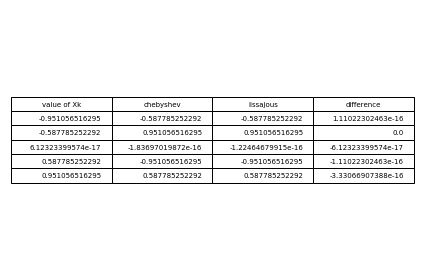

In [14]:
#code used to generate the table
fig, ax = plt.subplots()
columns = ['value of Xk', 'chebyshev', 'lissajous', 'difference']
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')
ax.axis("tight")
#new lists organizing the above lists into the rows to be presented in the table
row1 = [value[0],chebyshevlist[0],lissajouslist[0],differencelist[0]]
row2 = [value[1],chebyshevlist[1],lissajouslist[1],differencelist[1]]
row3 = [value[2],chebyshevlist[2],lissajouslist[2],differencelist[2]]
row4 = [value[3],chebyshevlist[3],lissajouslist[3],differencelist[3]]
row5 = [value[4],chebyshevlist[4],lissajouslist[4],differencelist[4]] 
datalist = [row1,row2,row3,row4,row5]
ax.table(cellText= datalist,colLabels = columns, loc = 'center')
fig.tight_layout()
print("This table is for N value: " + str(N))
plt.show()

As it can be observed in the difference column, the accuracy between the chebyshev and the lissajous is incredibly accurate because the difference is incredibly small it's practically negligable. Another way to check that y(x) are chebyshev polynomials is by graphing them and if the plots were to overlay then it could be observed that they are the same.

## Conclusion

From the completed tasks of creating a function to evaluate the chebyshev polynomials, plotting the created function, a function to evaluate the numeric integration of the weighted, plotting the lissajous curve, determining the maximum speed of an object along the curve, its position and putting everything together. The results from these tasks show that the methods practiced in this midterm compare quite nicely and the codes used are practical in their tasks.